In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID', 'Comorbidities'],  axis=1, inplace=True)
df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [7]:
# Create our features
X = df.drop('outcome', axis=1)
y = df['outcome']

In [8]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
    # Calculate the accuracy score
    y_pred_model = model.predict(X_test)
    accuracy_score_model = accuracy_score(y_test, y_pred_model)
    
    print(f"Accuracy score: {accuracy_score_model}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [9]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       767
         1.0       0.73      0.35      0.47       115

    accuracy                           0.90       882
   macro avg       0.82      0.66      0.71       882
weighted avg       0.89      0.90      0.88       882

[[752  15]
 [ 75  40]]
root mean squared error (RMSE): 0.31943828249996997
R-squared (R2 ): 0.10005101751601386
MAE 0.10204081632653061

Testing SET
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93       250
         1.0       0.73      0.36      0.48        44

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.87       294

[[244   6]
 [ 28  16]]
root mean squared error (RMSE): 0.3400680204068024
R-squared (R2 ): 0.0912727272727274
MAE 0.11564625850340136

Accuracy score: 0.8843537414965986



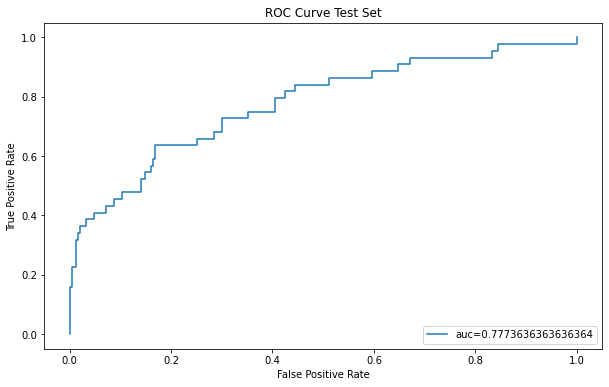

In [11]:
# Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [12]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                     Feature  Importance
35             Urea nitrogen    0.690491
46                      PCO2    0.645221
12                heart rate    0.477609
41                 Anion gap    0.338917
25                 Leucocyte    0.291992
13   Systolic blood pressure    0.248523
0                        age    0.240784
37           Blood potassium    0.188046
24                       RDW    0.166799
33           Creatine kinase    0.158321
31                       INR    0.145317
45               Lactic acid    0.139182
42             Magnesium ion    0.132026
21                       MCH    0.102506
19                hematocrit    0.095273
15          Respiratory rate    0.090248
43                        PH    0.068136
3               hypertensive    0.055747
4         atrialfibrillation    0.032772
5             CHD with no MI    0.029184
40                  Chloride    0.017451
8                 depression    0.014485
32                 NT-proBNP    0.012790
47              

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       250
         1.0       0.32      0.34      0.33        44

    accuracy                           0.79       294
   macro avg       0.60      0.61      0.60       294
weighted avg       0.80      0.79      0.80       294

[[218  32]
 [ 29  15]]
root mean squared error (RMSE): 0.4555030111835474
R-squared (R2 ): -0.6303636363636362
MAE 0.20748299319727892

Accuracy score: 0.7925170068027211



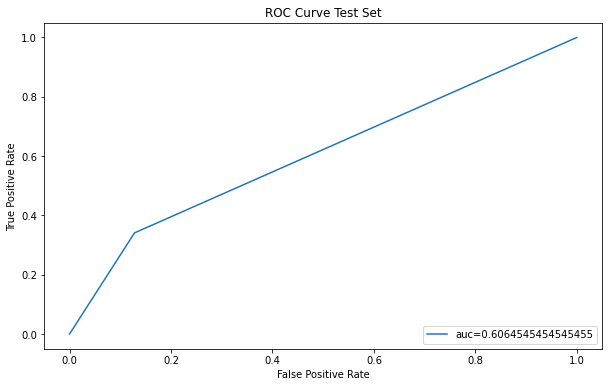

In [13]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       250
         1.0       1.00      0.07      0.13        44

    accuracy                           0.86       294
   macro avg       0.93      0.53      0.53       294
weighted avg       0.88      0.86      0.81       294

[[250   0]
 [ 41   3]]
root mean squared error (RMSE): 0.3734377890799553
R-squared (R2 ): -0.09581818181818158
MAE 0.13945578231292516

Accuracy score: 0.8605442176870748



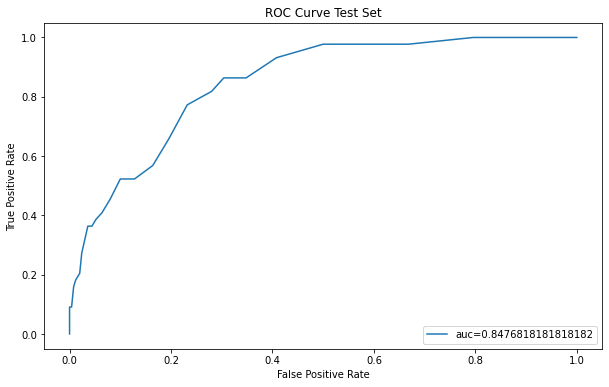

In [14]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [15]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.04815675239387839, 'Bicarbonate'),
 (0.04320504186737504, 'Urine output'),
 (0.042309304227366604, 'PH'),
 (0.04180791997593289, 'Lactic acid'),
 (0.04084806187023984, 'Leucocyte'),
 (0.04071643030233662, 'Anion gap'),
 (0.04032820456613488, 'Lymphocyte'),
 (0.039376402641346835, 'temperature'),
 (0.036483303534782935, 'Urea nitrogen'),
 (0.03619832745011613, 'Blood calcium'),
 (0.03014371387904638, 'Blood sodium'),
 (0.027604261617963814, 'Chloride'),
 (0.027312913659565837, 'Respiratory rate'),
 (0.027126447119182683, 'Systolic blood pressure'),
 (0.026380273462939433, 'glucose'),
 (0.024080586778145337, 'heart rate'),
 (0.0236583234058063, 'hematocrit'),
 (0.023324755194196415, 'Platelets'),
 (0.022493990958435163, 'Blood potassium'),
 (0.021797358217226656, 'PCO2'),
 (0.021704614654031708, 'Creatinine'),
 (0.021125013213586823, 'RBC'),
 (0.0208123962283543, 'Magnesium ion'),
 (0.0192718112271118, 'INR'),
 (0.01881725289634251, 'age'),
 (0.018786033648191352, 'BMI'),
 (0.0181971

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       250
         1.0       1.00      0.07      0.13        44

    accuracy                           0.86       294
   macro avg       0.93      0.53      0.53       294
weighted avg       0.88      0.86      0.81       294

[[250   0]
 [ 41   3]]
root mean squared error (RMSE): 0.3734377890799553
R-squared (R2 ): -0.09581818181818158
MAE 0.13945578231292516

Accuracy score: 0.8605442176870748



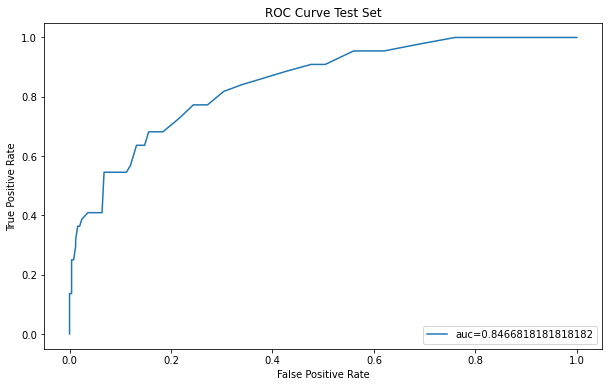

In [16]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       767
         1.0       0.83      0.60      0.70       115

    accuracy                           0.93       882
   macro avg       0.89      0.79      0.83       882
weighted avg       0.93      0.93      0.93       882

[[753  14]
 [ 46  69]]
root mean squared error (RMSE): 0.26082026547865056
R-squared (R2 ): 0.40003401167734254
MAE 0.06802721088435375

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       250
         1.0       0.41      0.32      0.36        44

    accuracy                           0.83       294
   macro avg       0.65      0.62      0.63       294
weighted avg       0.81      0.83      0.82       294

[[230  20]
 [ 30  14]]
root mean squared error (RMSE): 0.41239304942116123
R-squared (R2 ): -0.3363636363636362
MAE 0.17006802721088435

Accuracy score: 0.8299319727891157



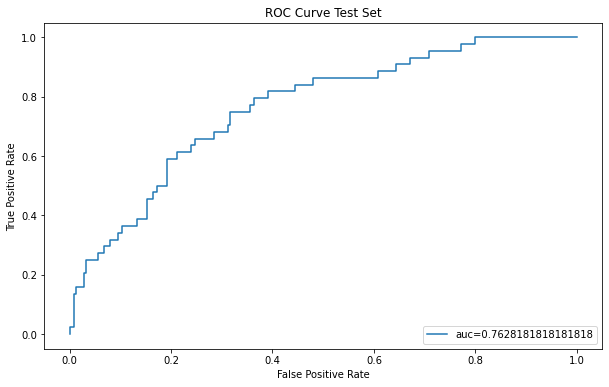

In [17]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       767
         1.0       1.00      0.80      0.89       115

    accuracy                           0.97       882
   macro avg       0.99      0.90      0.94       882
weighted avg       0.97      0.97      0.97       882

[[767   0]
 [ 23  92]]
root mean squared error (RMSE): 0.16148404721726828
R-squared (R2 ): 0.7700130378096479
MAE 0.026077097505668934

Testing SET
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       250
         1.0       0.56      0.20      0.30        44

    accuracy                           0.86       294
   macro avg       0.72      0.59      0.61       294
weighted avg       0.83      0.86      0.83       294

[[243   7]
 [ 35   9]]
root mean squared error (RMSE): 0.3779644730092272
R-squared (R2 ): -0.12254545454545429
MAE 0.14285714285714285

Accuracy score: 0.8571428571428571



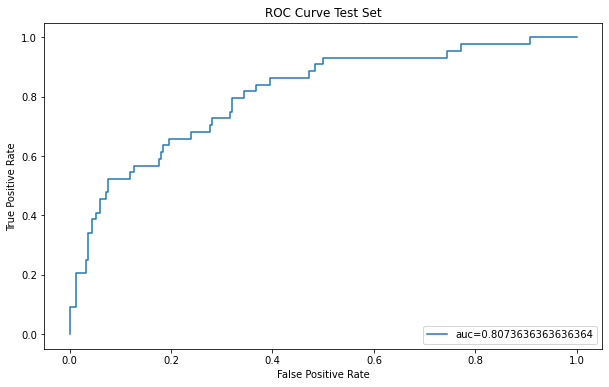

In [18]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       250
         1.0       0.69      0.20      0.32        44

    accuracy                           0.87       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.85      0.87      0.84       294

[[246   4]
 [ 35   9]]
root mean squared error (RMSE): 0.3642156795423418
R-squared (R2 ): -0.04236363636363616
MAE 0.1326530612244898

Accuracy score: 0.8673469387755102



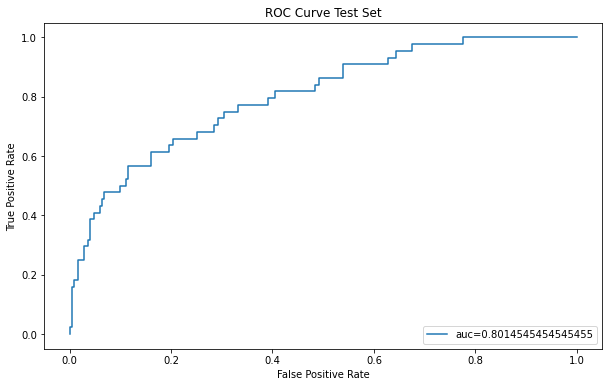

In [19]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       250
         1.0       0.64      0.16      0.25        44

    accuracy                           0.86       294
   macro avg       0.75      0.57      0.59       294
weighted avg       0.83      0.86      0.82       294

[[246   4]
 [ 37   7]]
root mean squared error (RMSE): 0.3734377890799553
R-squared (R2 ): -0.09581818181818158
MAE 0.13945578231292516

Accuracy score: 0.8605442176870748



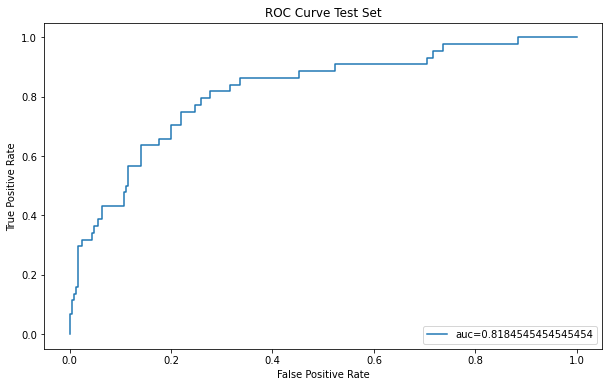

In [20]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       767
         1.0       1.00      0.40      0.57       115

    accuracy                           0.92       882
   macro avg       0.96      0.70      0.76       882
weighted avg       0.93      0.92      0.91       882

[[767   0]
 [ 69  46]]
root mean squared error (RMSE): 0.2796985743921603
R-squared (R2 ): 0.31003911342894397
MAE 0.0782312925170068

Testing SET
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       250
         1.0       1.00      0.05      0.09        44

    accuracy                           0.86       294
   macro avg       0.93      0.52      0.50       294
weighted avg       0.88      0.86      0.80       294

[[250   0]
 [ 42   2]]
root mean squared error (RMSE): 0.3779644730092272
R-squared (R2 ): -0.12254545454545429
MAE 0.14285714285714285

Accuracy score: 0.8571428571428571



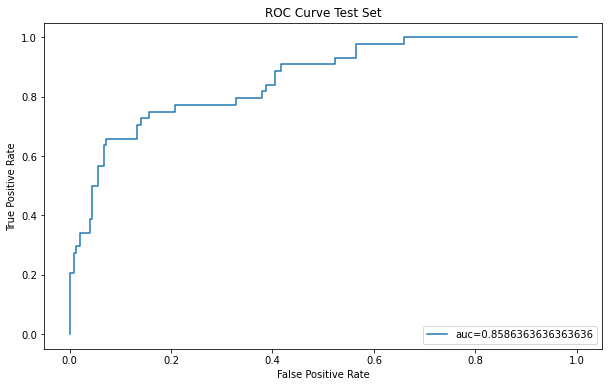

In [21]:
clf = svm.SVC(probability=True)
clf = evaluateModel(clf, X_train, y_train, X_test, y_test)

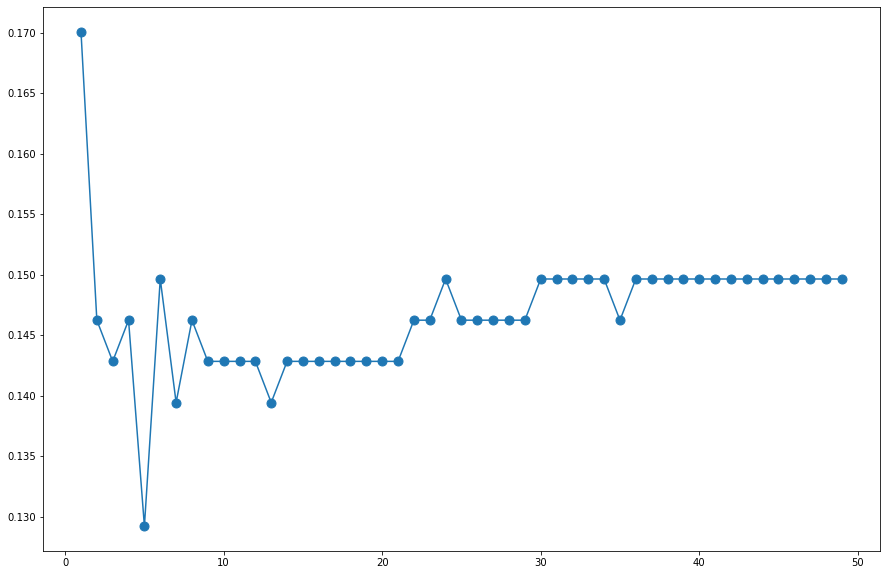

In [22]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       767
         1.0       0.85      0.20      0.32       115

    accuracy                           0.89       882
   macro avg       0.87      0.60      0.63       882
weighted avg       0.89      0.89      0.86       882

[[763   4]
 [ 92  23]]
root mean squared error (RMSE): 0.329914439536929
R-squared (R2 ): 0.04005441868374804
MAE 0.10884353741496598

Testing SET
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       250
         1.0       1.00      0.14      0.24        44

    accuracy                           0.87       294
   macro avg       0.93      0.57      0.58       294
weighted avg       0.89      0.87      0.83       294

[[250   0]
 [ 38   6]]
root mean squared error (RMSE): 0.35951592548908334
R-squared (R2 ): -0.01563636363636345
MAE 0.1292517006802721

Accuracy score: 0.8707482993197279



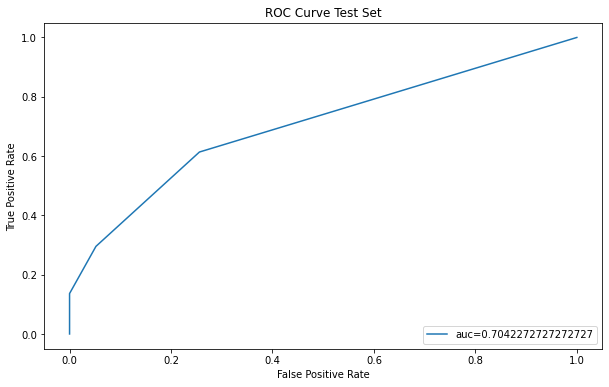

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)